Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.AZ9EOH_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.AZ9EOH_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Training pairs shape: (120000, 2, 28, 28, 1)
Training labels shape: (120000,)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 128)       │    223,744 │ input_layer_1[0]… │
│ (Functional)        │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1)         │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 223,744 (874.00 KB)

 Trainable params: 223,744 (874.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0776 - val_loss: 0.0316
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0285 - val_loss: 0.0244
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0202 - val_loss: 0.0201
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0158 - val_loss: 0.0202
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0138 - val_loss: 0.0187
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0120 - val_loss: 0.0187
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0112 - val_loss: 0.0187
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0102 - val_loss: 0.0180
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0096 - val_loss: 0.0184
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0088 - val_loss: 0.0181
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


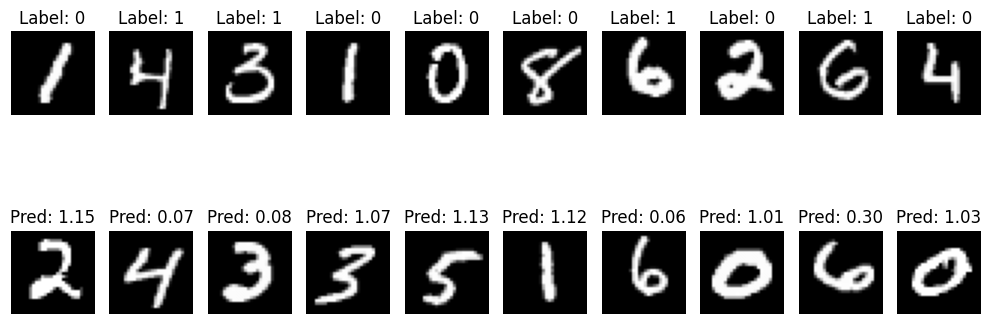

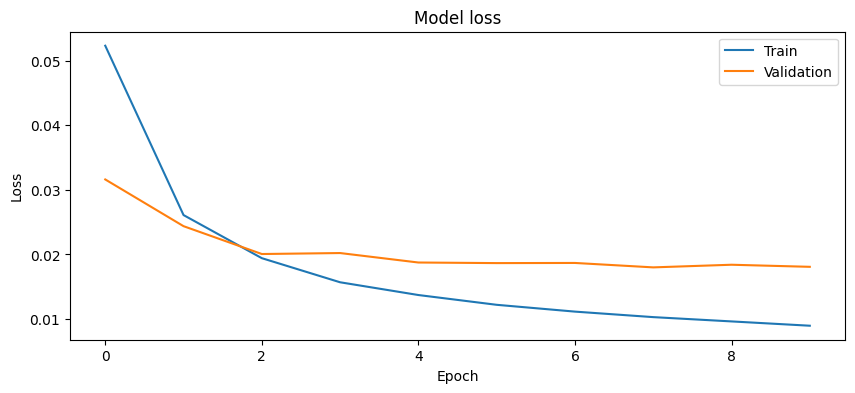

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Data Preparation ---

def create_image_pairs(dataset, labels):
    """Creates positive and negative pairs of images."""
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs = []
    pair_labels = []

    for idx1 in range(len(dataset)):
        # Get the current image and its label
        x1 = dataset[idx1]
        label1 = labels[idx1]

        # Add a positive pair
        idx2 = np.random.choice(digit_indices[label1])
        x2 = dataset[idx2]
        pairs.append([x1, x2])
        pair_labels.append(1.0)

        # Add a negative pair
        label2 = np.random.randint(0, 10)
        while label2 == label1:
            label2 = np.random.randint(0, 10)
        idx2 = np.random.choice(digit_indices[label2])
        x2 = dataset[idx2]
        pairs.append([x1, x2])
        pair_labels.append(0.0)

    return np.array(pairs), np.array(pair_labels)

# Load and preprocess MNIST dataset
(train_ds, test_ds), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Normalize and extract images and labels
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

train_dataset = train_ds.map(normalize_img)
test_dataset = test_ds.map(normalize_img)

train_images = np.array([x for x, y in train_dataset])
train_labels = np.array([y for x, y in train_dataset])
test_images = np.array([x for x, y in test_dataset])
test_labels = np.array([y for x, y in test_dataset])

# Create training and validation pairs
train_pairs, train_y = create_image_pairs(train_images, train_labels)
test_pairs, test_y = create_image_pairs(test_images, test_labels)

print(f"Training pairs shape: {train_pairs.shape}")
print(f"Training labels shape: {train_y.shape}")

# --- 2. Build the Siamese Network ---

def create_base_network(input_shape):
    """Creates the base CNN model that produces the embeddings."""
    input = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(input)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    return tf.keras.Model(input, x)

def euclidean_distance(vects):
    """Calculates the euclidean distance between two vectors."""
    x, y = vects
    sum_square = tf.reduce_sum(tf.square(x - y), axis=1, keepdims=True)
    return tf.sqrt(tf.maximum(sum_square, tf.keras.backend.epsilon()))

# Define the model architecture
input_shape = (28, 28, 1)
base_network = create_base_network(input_shape)

input_a = tf.keras.layers.Input(shape=input_shape)
input_b = tf.keras.layers.Input(shape=input_shape)

# Process both inputs with the same base network
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Calculate the distance between the embeddings
distance = tf.keras.layers.Lambda(euclidean_distance)([processed_a, processed_b])

model = tf.keras.Model([input_a, input_b], distance)
model.summary()

# --- 3. Contrastive Loss Function ---

def contrastive_loss(y_true, y_pred):
    """Contrastive loss function.

    y_true: label (1 for similar, 0 for dissimilar)
    y_pred: predicted distance from the model
    """
    margin = 1.0
    square_pred = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)

# --- 4. Training and Evaluation ---

# Compile the model
model.compile(loss=contrastive_loss, optimizer=tf.keras.optimizers.Adam(0.001))

# Train the model
history = model.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],
    train_y,
    epochs=10,
    batch_size=128,
    validation_data=([test_pairs[:, 0], test_pairs[:, 1]], test_y),
)

# --- 5. Visualize Results ---

def display_image_pairs(pairs, labels, predictions, num_items=10):
    """Displays pairs of images, their true label, and the predicted distance."""
    plt.figure(figsize=(10, 5))
    for i in range(num_items):
        ax = plt.subplot(2, num_items, i + 1)
        plt.imshow(pairs[i, 0].squeeze(), cmap='gray')
        plt.title(f"Label: {int(labels[i])}")
        plt.axis('off')

        ax = plt.subplot(2, num_items, num_items + i + 1)
        plt.imshow(pairs[i, 1].squeeze(), cmap='gray')
        plt.title(f"Pred: {predictions[i][0]:.2f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get predictions on test pairs
predictions = model.predict([test_pairs[:, 0], test_pairs[:, 1]])

# Select random pairs to display
random_indices = np.random.choice(len(test_y), size=10)
display_image_pairs(test_pairs[random_indices], test_y[random_indices], predictions[random_indices])

# Plot training & validation loss values
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


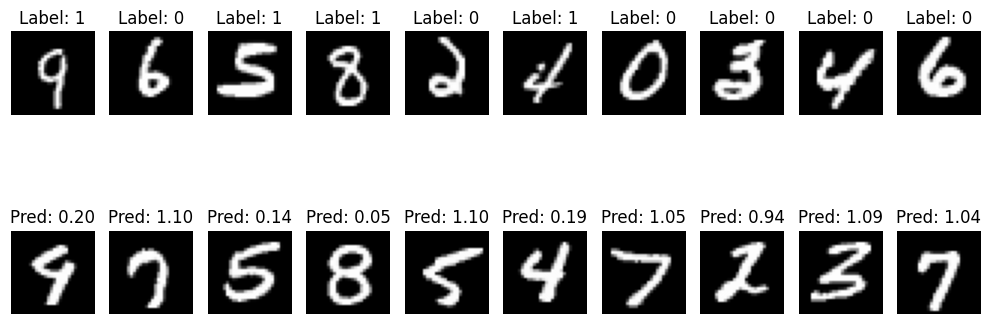

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0198
Loss on test subset: 0.01968839205801487


In [ ]:
# prompt: test on more data

import numpy as np
# Create a smaller subset of the test data for faster testing
test_pairs_subset = test_pairs[:1000]
test_y_subset = test_y[:1000]

# Get predictions on the subset of test pairs
predictions_subset = model.predict([test_pairs_subset[:, 0], test_pairs_subset[:, 1]])

# Select random pairs from the subset to display
random_indices_subset = np.random.choice(len(test_y_subset), size=10)
display_image_pairs(test_pairs_subset[random_indices_subset], test_y_subset[random_indices_subset], predictions_subset[random_indices_subset])

# You can also evaluate the loss on the test subset
loss_subset = model.evaluate([test_pairs_subset[:, 0], test_pairs_subset[:, 1]], test_y_subset)
print(f"Loss on test subset: {loss_subset}")

In [ ]:
# prompt: save the model

model.save("siamese_mnist_model.keras")